In [1]:
%pylab inline
import pandas as pd
import uproot
import awkward as ak
from yahist import Hist1D
from yahist.utils import plot_stack
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

Populating the interactive namespace from numpy and matplotlib


In [2]:
t = uproot.open("../output.root")["t"]

In [3]:
df = t.arrays(library = "pd")

In [4]:
df.columns

Index(['lep2_id_vs_j', 'Category', 'lep2_charge', 'lep2_pdgId', 'lep2_id_vs_m',
       'lep2_mass', 'gg_dR', 'nJet', 'g2_ptmgg', 'lep2_phi', 'g1_phi',
       'g2_pixVeto', 'weight', 'lep2_tightID', 'lep1_id_vs_j', 'process_id',
       'g1_ptmgg', 'gg_pt', 'year', 'g2_phi', 'g1_eta', 'm_tautau_vis',
       'lep2_id_vs_e', 'g2_pt', 'g2_eta', 'g1_idmva', 'mgg', 'eta_tautau_vis',
       'g2_idmva', 'g1_pixVeto', 'lep1_id_vs_m', 'jet1_pt', 'lep1_id_vs_e',
       'jet1_eta', 'MET_pt', 'jet1_id', 'gg_phi', 'pt_tautau_vis', 'MET_phi',
       'jet2_pt', 'jet1_bTag', 'lep2_pt', 'gg_eta', 'jet2_bTag', 'jet2_id',
       'lep1_pt', 'lep1_eta', 'lep1_pdgId', 'phi_tautau_vis', 'g1_pt',
       'lep2_eta', 'jet2_eta', 'lep1_phi', 'lep1_mass', 'lep1_charge',
       'lep1_tightID'],
      dtype='object')

In [5]:
df.loc[df["process_id"] == 0, "Category"].unique()

array([], dtype=float32)

In [6]:
process_ids = {}
process_ids["Data"] = 0
process_ids["HH_ggTauTau"] = -1
process_ids["HH_ggZZ"] = -2
process_ids["HH_ggWW_dileptonic"] = -3
process_ids["HH_ggWW_semileptonic"] = -4
process_ids["DiPhoton"] = 3
process_ids["GJets"] = 8
process_ids["TTGG"] = 7
process_ids["TTGamma"] = 6
process_ids["TTbar"] = 5
process_ids["VH"] = 9
process_ids["WGamma"] = 4
process_ids["ZGamma"] = 2
process_ids["ttH"] = 10
process_ids["ggH"] = 11
process_ids["VBFH"] = 12

In [7]:
is_resonant = {}

is_resonant["Data"] = False
is_resonant["DiPhoton"] = False
is_resonant["GJets"] = False
is_resonant["HH_ggTauTau"] = True
is_resonant["HH_ggZZ"] = True
is_resonant["HH_ggWW_dileptonic"] = True
is_resonant["HH_ggWW_semileptonic"] = True
is_resonant["TTGG"] = False
is_resonant["TTGamma"] = False
is_resonant["TTbar"] = False
is_resonant["VH"] = True
is_resonant["WGamma"] = False
is_resonant["ZGamma"] = False
is_resonant["ttH"] = True
is_resonant["ggH"] = True
is_resonant["VBFH"] = True


### Glorious plots of Glorious BDT distributions

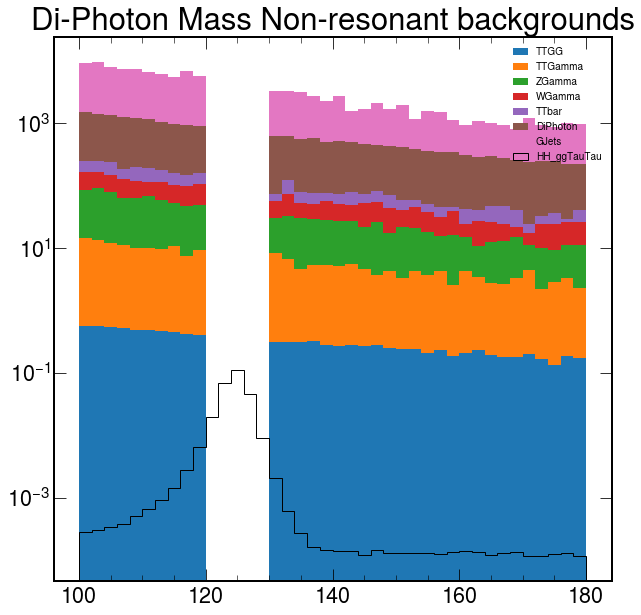

In [8]:
mgg_binning = "40,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process] and "HH_ggTauTau" not in process:
        continue
    toFill = df.loc[df["process_id"] == process_id, "mgg"] # select by process, then select the quantity
    weight = df.loc[df["process_id"] == process_id, "weight"]
    mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mgg_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
 #mgg_hists["Data"].plot(show_errors=True, color="k")
mgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
plt.title("Di-Photon Mass Non-resonant backgrounds")
ax.set_yscale("log")
ax.legend(fontsize=10)

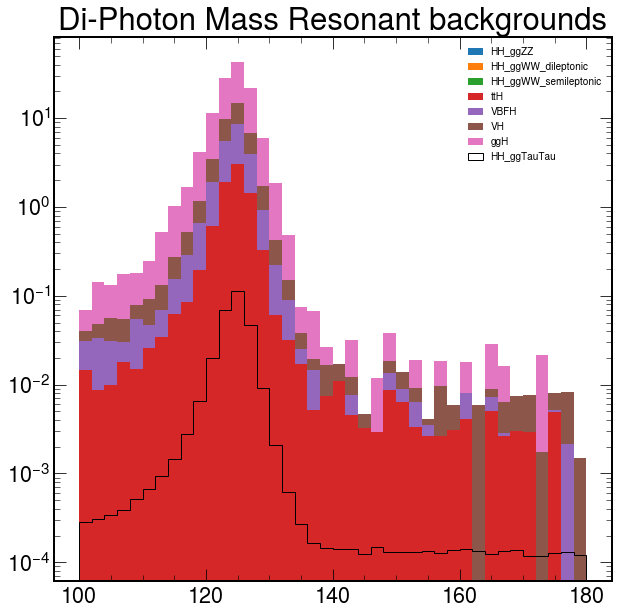

In [9]:
mgg_binning = "40,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process]:
        continue
    toFill = df.loc[df["process_id"] == process_id, "mgg"] # select by process, then select the quantity
    weight = df.loc[df["process_id"] == process_id, "weight"]
    mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mgg_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mgg_hists["Data"].plot(show_errors=True, color="k")
mgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
plt.title("Di-Photon Mass Resonant backgrounds")
ax.set_yscale("log")
ax.legend(fontsize=10)

Text(0.5, 1.0, 'Leading photon pt/mgg non-resonant backgrounds')

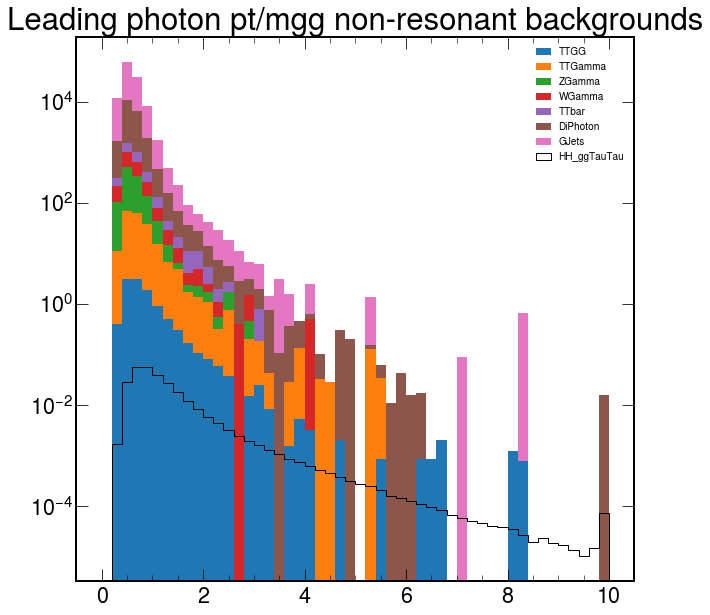

In [10]:
g1_ptmgg_binning = "50,0,10" # ROOT convention

g1_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g1_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_ptmgg_hists[process] = Hist1D(toFill.values, bins=g1_ptmgg_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_ptmgg_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_ptmgg_hists["Data"].plot(show_errors=True, color="k")
g1_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt/mgg non-resonant backgrounds")

Text(0.5, 1.0, 'Leading photon pt/mgg resonant backgrounds')

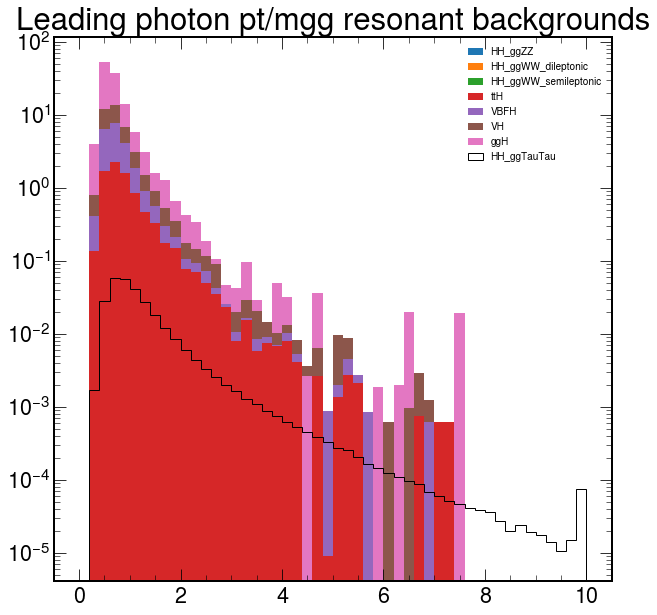

In [11]:
g1_ptmgg_binning = "50,0,10" # ROOT convention

g1_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g1_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_ptmgg_hists[process] = Hist1D(toFill.values, bins=g1_ptmgg_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_ptmgg_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
g1_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt/mgg resonant backgrounds")

Text(0.5, 1.0, 'Sub-leading photon pt/mgg non-resonant backgrounds')

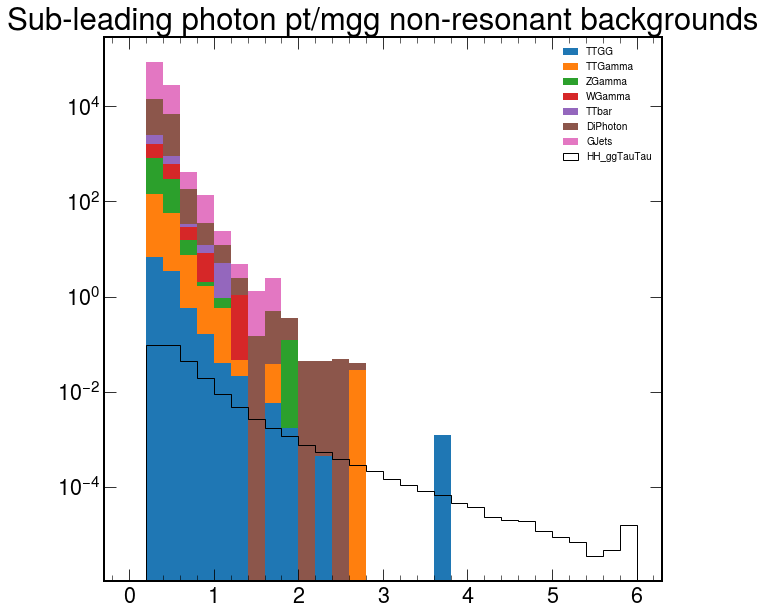

In [12]:
g2_ptmgg_binning = "30,0,6" # ROOT convention

g2_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g2_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_ptmgg_hists[process] = Hist1D(toFill.values, bins=g2_ptmgg_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g2_ptmgg_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_ptmgg_hists["Data"].plot(show_errors=True, color="k")
g2_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Sub-leading photon pt/mgg non-resonant backgrounds")

Text(0.5, 1.0, 'Subleading photon pt/mgg resonant backgrounds')

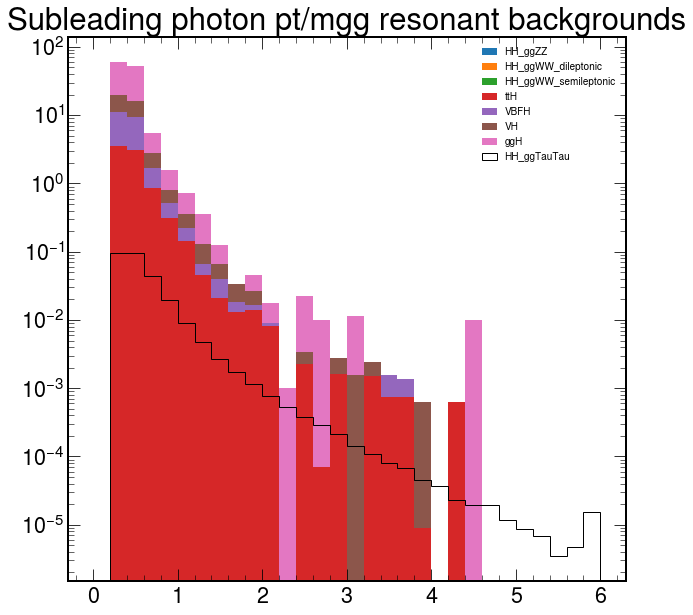

In [13]:
g2_ptmgg_binning = "30,0,6" # ROOT convention

g2_ptmgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g2_ptmgg"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_ptmgg_hists[process] = Hist1D(toFill.values, bins=g2_ptmgg_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g2_ptmgg_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
g2_ptmgg_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Subleading photon pt/mgg resonant backgrounds")

Text(0.5, 1.0, 'Leading photon pt non-resonant backgrounds')

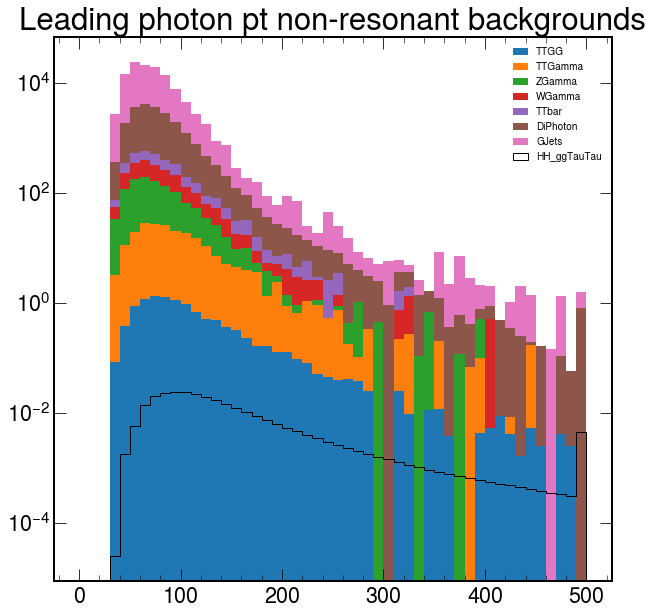

In [14]:
g1_pt_binning = "50,0,500" # ROOT convention

g1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g1_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_pt_hists[process] = Hist1D(toFill.values, bins=g1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_pt_hists["Data"].plot(show_errors=True, color="k")
g1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt non-resonant backgrounds")

Text(0.5, 1.0, 'Leading photon pt Resonant backgrounds')

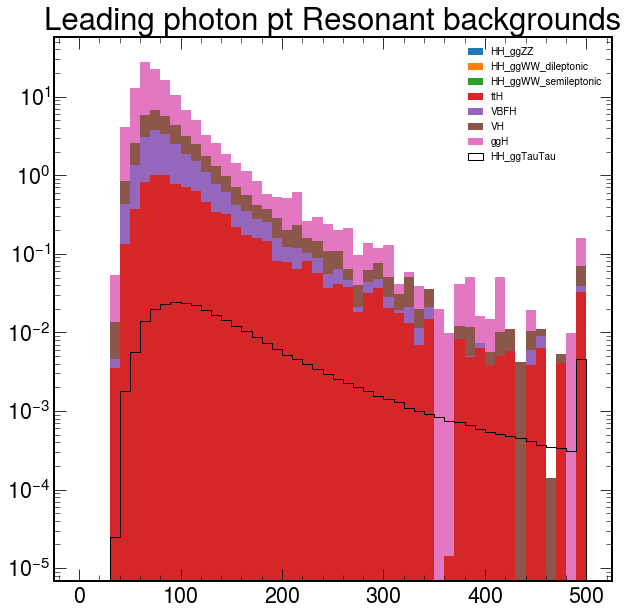

In [15]:
g1_pt_binning = "50,0,500" # ROOT convention

g1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g1_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_pt_hists[process] = Hist1D(toFill.values, bins=g1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ead_pho_pt_hists["Data"].plot(show_errors=True, color="k")
g1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading photon pt Resonant backgrounds")

Text(0.5, 1.0, 'Subleading photon pt non-resonant backgrounds')

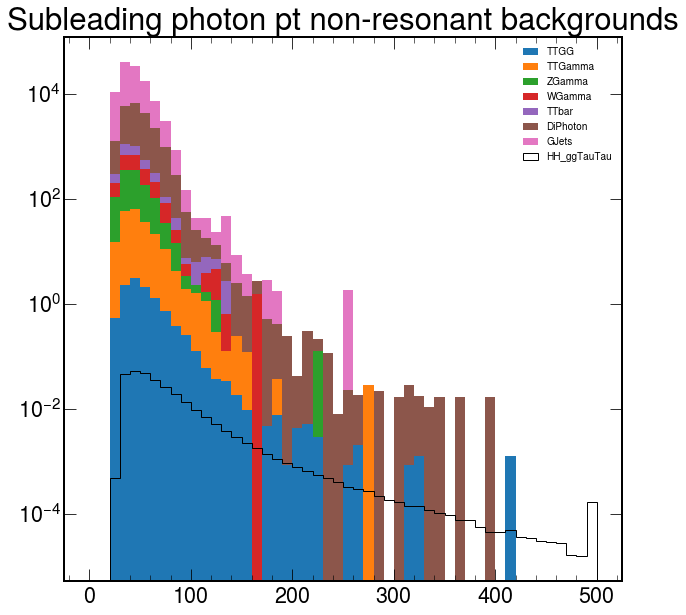

In [16]:
g2_pt_binning = "50,0,500" # ROOT convention

g2_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g2_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_pt_hists[process] = Hist1D(toFill.values, bins=g2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_pt_hists["Data"].plot(show_errors=True, color="k")
g2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Subleading photon pt non-resonant backgrounds")

Text(0.5, 1.0, 'Subleading photon pt Resonant backgrounds')

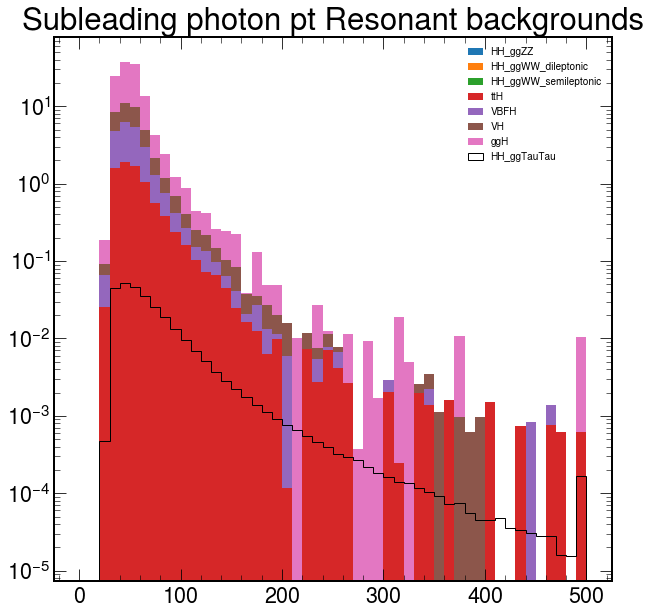

In [17]:
g2_pt_binning = "50,0,500" # ROOT convention

g2_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g2_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_pt_hists[process] = Hist1D(toFill.values, bins=g2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_pt_hists["Data"].plot(show_errors=True, color="k")
g2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Subleading photon pt Resonant backgrounds")

Text(0.5, 1.0, 'Leading Photon $\\eta$ non-resonant backgrounds')

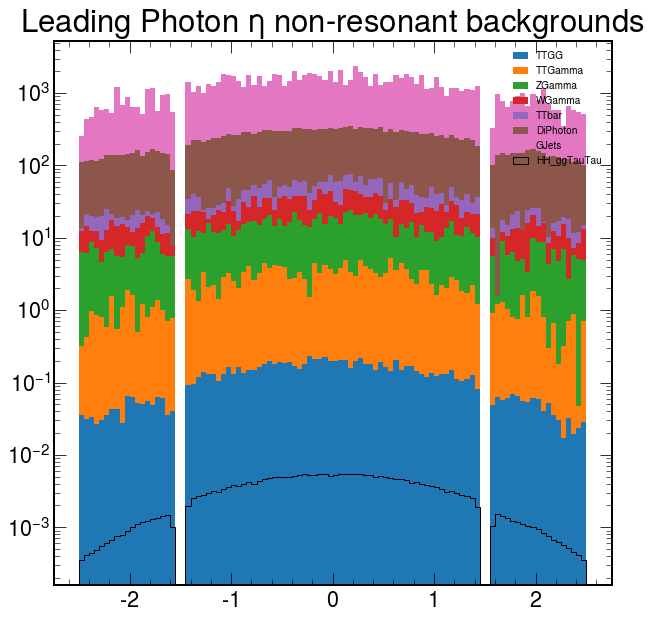

In [18]:
g1_eta_binning = "100,-2.5,2.5" # ROOT convention

g1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g1_eta"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_eta_hists[process] = Hist1D(toFill.values, bins=g1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_eta_hists["Data"].plot(show_errors=True, color="k")
g1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Photon $\eta$ non-resonant backgrounds")

Text(0.5, 1.0, 'Leading Photon eta resonant backgrounds')

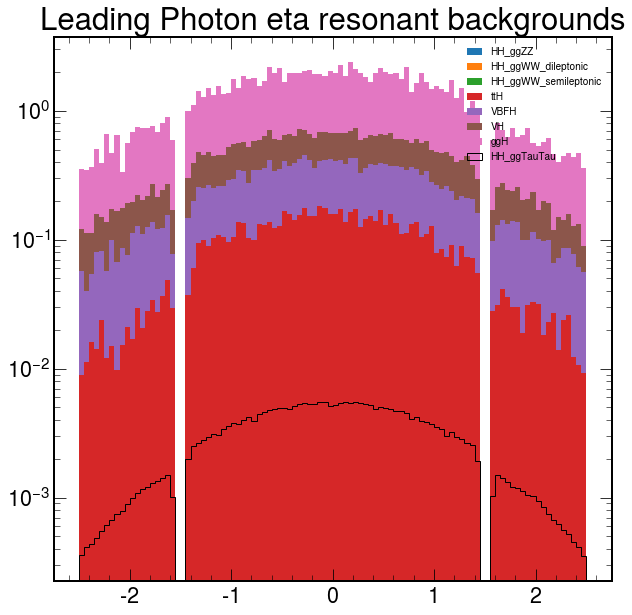

In [19]:
g1_eta_binning = "100,-2.5,2.5" # ROOT convention

g1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "g1_eta"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_eta_hists[process] = Hist1D(toFill.values, bins=g1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_eta_hists["Data"].plot(show_errors=True, color="k")
g1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Photon eta resonant backgrounds")

Text(0.5, 1.0, 'Leading Photon phi non-resonant backgrounds')

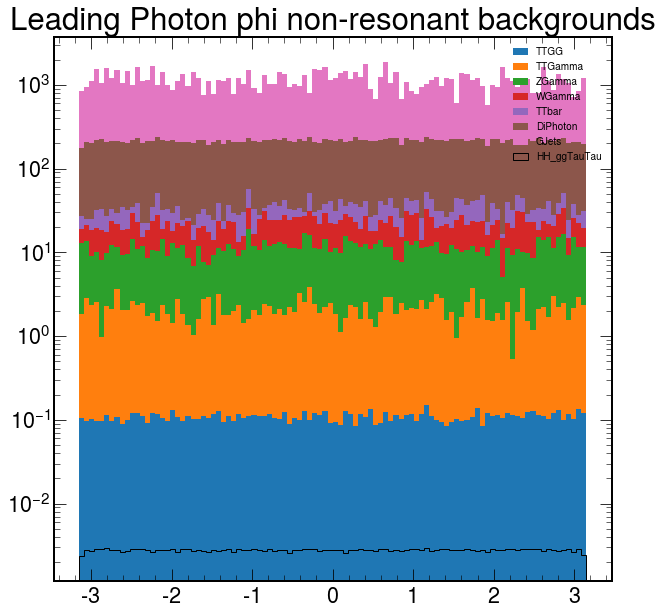

In [20]:
g1_phi_binning = "100,-3.15,3.15" # ROOT convention

g1_phi_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g1_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g1_phi_hists[process] = Hist1D(toFill.values, bins=g1_phi_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g1_phi_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g1_phi_hists["Data"].plot(show_errors=True, color="k")
g1_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Photon phi non-resonant backgrounds")

Text(0.5, 1.0, 'subleading Photon phi non-resonant backgrounds')

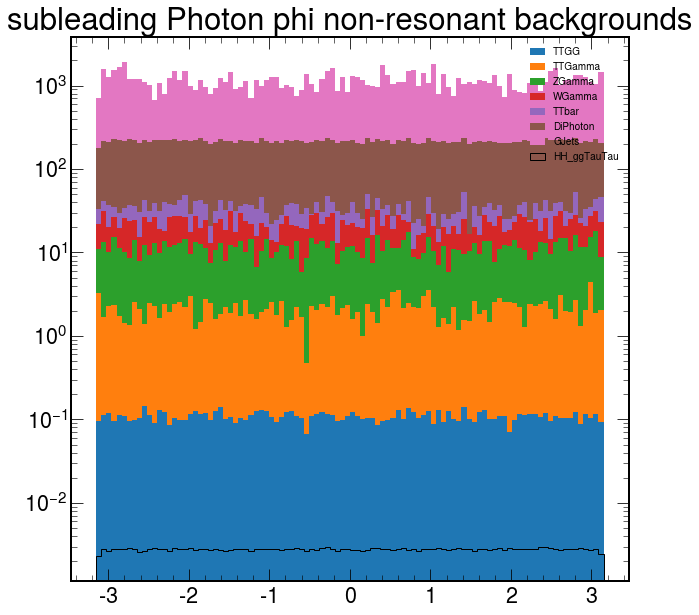

In [21]:
g2_phi_binning = "100,-3.15,3.15" # ROOT convention

g2_phi_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "g2_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        g2_phi_hists[process] = Hist1D(toFill.values, bins=g2_phi_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in g2_phi_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#g2_phi_hists["Data"].plot(show_errors=True, color="k")
g2_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("subleading Photon phi non-resonant backgrounds")

Text(0.5, 1.0, 'MET pt non-resonant backgrounds')

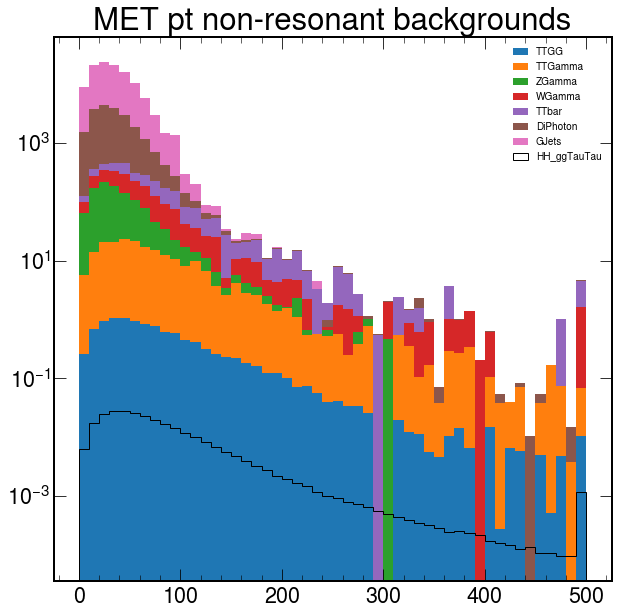

In [22]:
MET_pt_binning = "50,0,500" # ROOT convention

MET_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "MET_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_pt_hists[process] = Hist1D(toFill.values, bins=MET_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in MET_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_pt_hists["Data"].plot(show_errors=True, color="k")
MET_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET pt non-resonant backgrounds")

Text(0.5, 1.0, 'MET pt Resonant backgrounds')

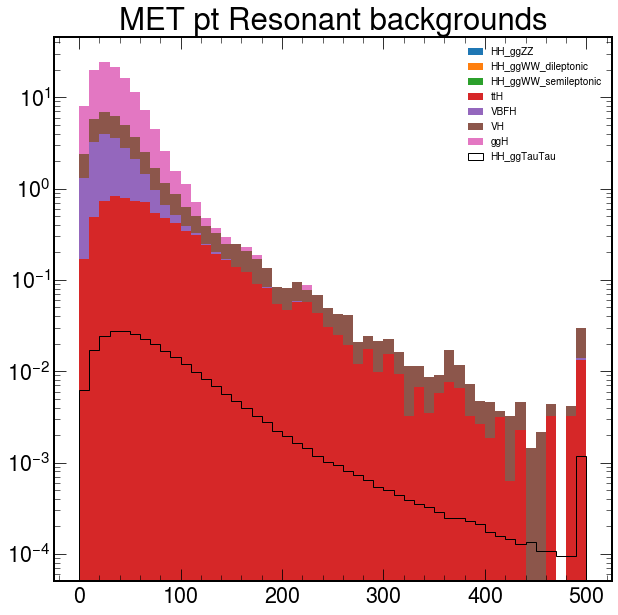

In [23]:
MET_pt_binning = "50,0,500" # ROOT convention

MET_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "MET_pt"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_pt_hists[process] = Hist1D(toFill.values, bins=MET_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in MET_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_pt_hists["Data"].plot(show_errors=True, color="k")
MET_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET pt Resonant backgrounds")

Text(0.5, 1.0, 'MET phi non-resonant backgrounds')

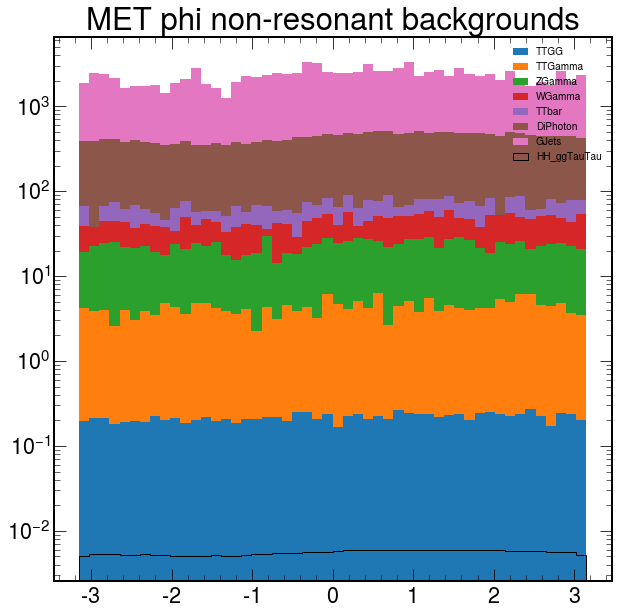

In [24]:
MET_phi_binning = "50,-3.15,3.15" # ROOT convention

MET_phi_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "MET_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_phi_hists[process] = Hist1D(toFill.values, bins=MET_phi_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in MET_phi_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_phi_hists["Data"].plot(show_errors=True, color="k")
MET_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET phi non-resonant backgrounds")

Text(0.5, 1.0, 'MET phi resonant backgrounds')

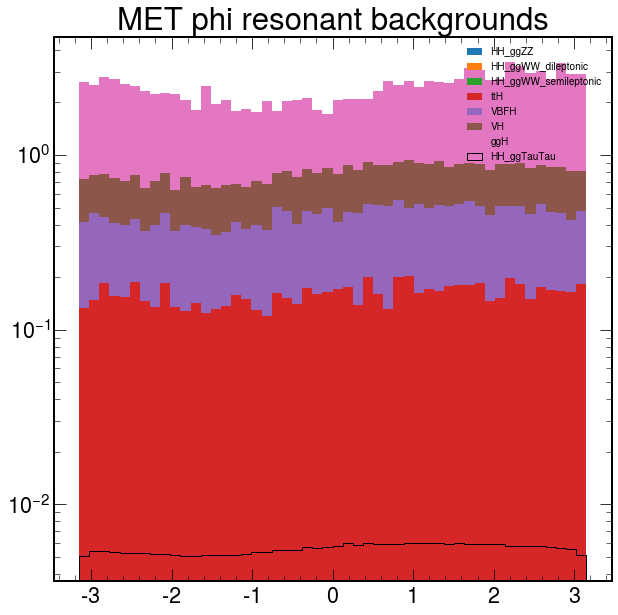

In [25]:
MET_phi_binning = "50,-3.15,3.15" # ROOT convention

MET_phi_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "MET_phi"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        MET_phi_hists[process] = Hist1D(toFill.values, bins=MET_phi_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in MET_phi_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#MET_phi_hists["Data"].plot(show_errors=True, color="k")
MET_phi_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("MET phi resonant backgrounds")

Text(0.5, 1.0, 'DiPhoton $\\Delta$R resonant backgrounds')

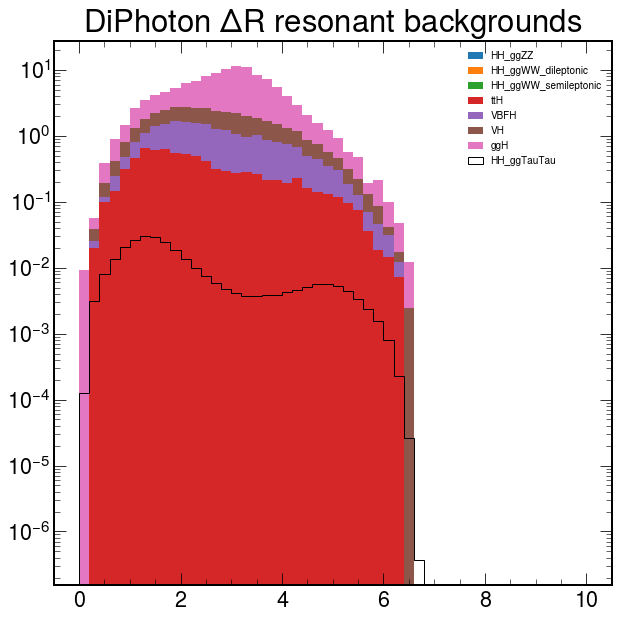

In [26]:
gg_dR_binning = "50,0,10" # ROOT convention

gg_dR_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[df["process_id"] == process_id, "gg_dR"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        gg_dR_hists[process] = Hist1D(toFill.values, bins=gg_dR_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in gg_dR_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#gg_dR_hists["Data"].plot(show_errors=True, color="k")
gg_dR_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("DiPhoton $\Delta$R resonant backgrounds")

Text(0.5, 1.0, 'DiPhoton $\\Delta$R non-resonant backgrounds')

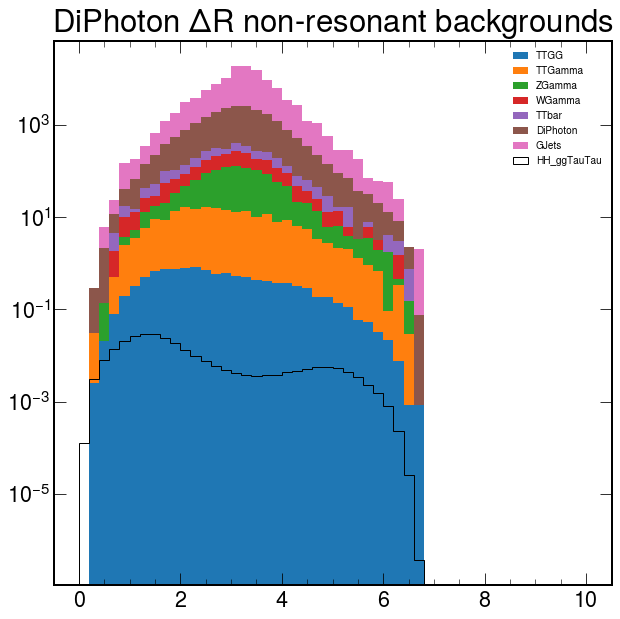

In [27]:
gg_dR_binning = "50,0,10" # ROOT convention

gg_dR_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[df["process_id"] == process_id, "gg_dR"] # select by process, then select the quantity
        weight = df.loc[df["process_id"] == process_id, "weight"]
        gg_dR_hists[process] = Hist1D(toFill.values, bins=gg_dR_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in gg_dR_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#gg_dR_hists["Data"].plot(show_errors=True, color="k")
gg_dR_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("DiPhoton $\Delta$R non-resonant backgrounds")

Text(0.5, 1.0, 'Leading Electron pt (ee and e-tau) - non resonant backgrounds')

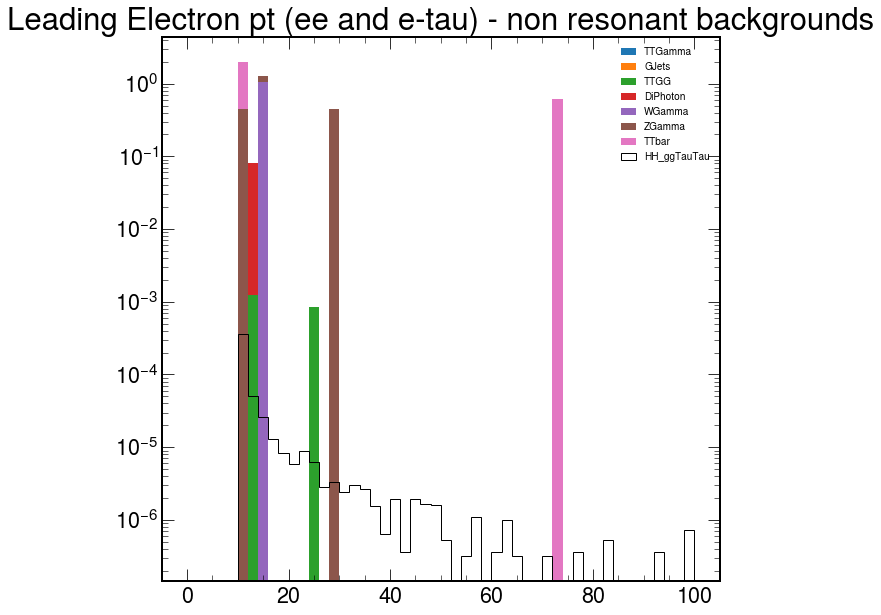

In [28]:
ele1_pt_binning = "50,0,100" # ROOT convention # Only electrons!

ele1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "weight"]
        ele1_pt_hists[process] = Hist1D(toFill.values, bins=ele1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron pt (ee and e-tau) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Electron eta (ee and e-tau) - non resonant backgrounds')

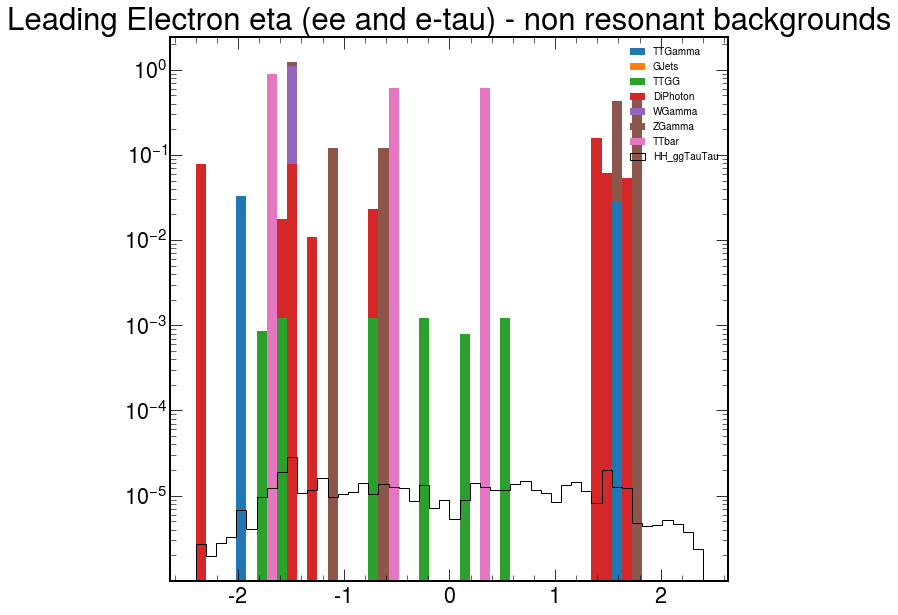

In [29]:
ele1_eta_binning = "50,-2.4,2.4" # ROOT convention # Only electrons!

ele1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "weight"]
        ele1_eta_hists[process] = Hist1D(toFill.values, bins=ele1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_eta_hists["Data"].plot(show_errors=True, color="k")
ele1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron eta (ee and e-tau) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Electron pt (ee and e-tau) - resonant backgrounds')

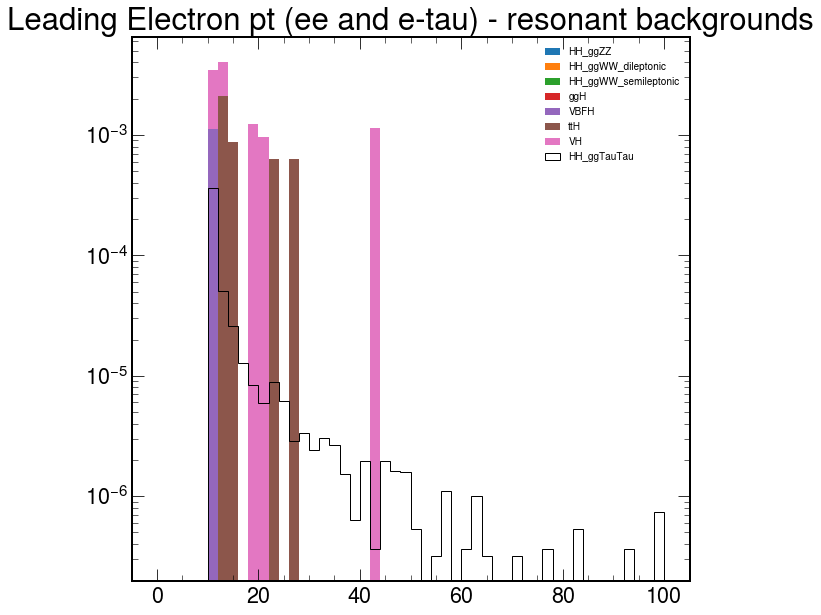

In [30]:
ele1_pt_binning = "50,0,100" # ROOT convention # Only electrons!

ele1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "weight"]
        ele1_pt_hists[process] = Hist1D(toFill.values, bins=ele1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron pt (ee and e-tau) - resonant backgrounds")

Text(0.5, 1.0, 'Leading Electron eta (ee and e-tau) - resonant backgrounds')

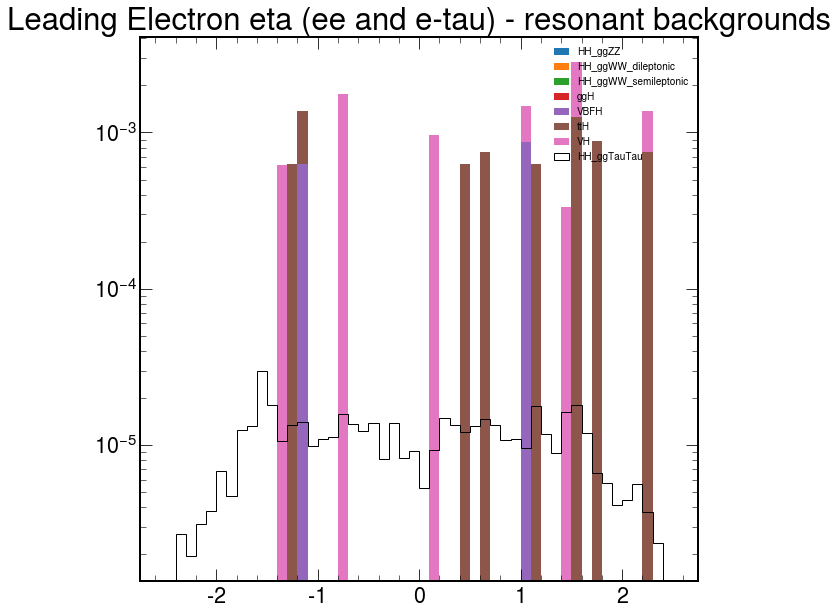

In [31]:
ele1_eta_binning = "50,-2.5,2.5" # ROOT convention # Only electrons!

ele1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 11), "weight"]
        ele1_eta_hists[process] = Hist1D(toFill.values, bins=ele1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_eta_hists["Data"].plot(show_errors=True, color="k")
ele1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Electron eta (ee and e-tau) - resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron pt (e-mu) - non resonant backgrounds')

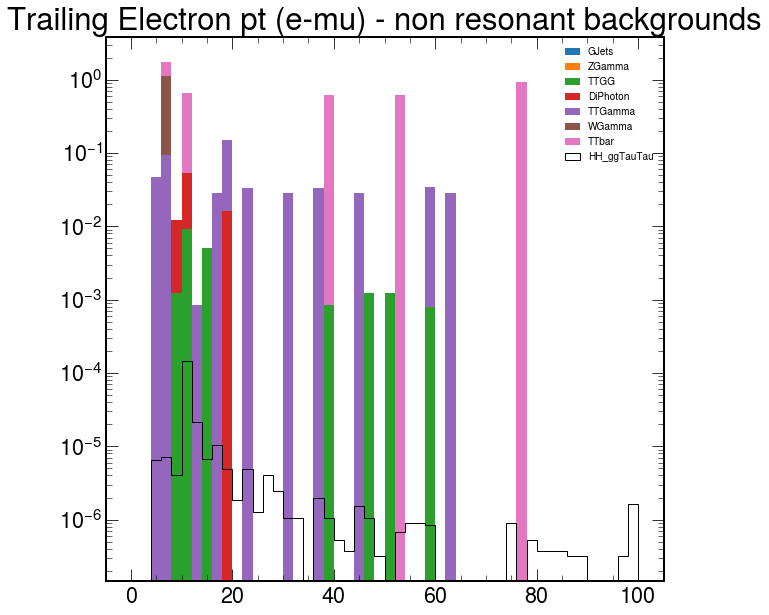

In [32]:
ele2_pt_binning = "50,0,100" # ROOT convention # Only electrons!

ele2_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "weight"]
        ele2_pt_hists[process] = Hist1D(toFill.values, bins=ele2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_pt_hists["Data"].plot(show_errors=True, color="k")
ele2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron pt (e-mu) - non resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron eta (e-mu) - non resonant backgrounds')

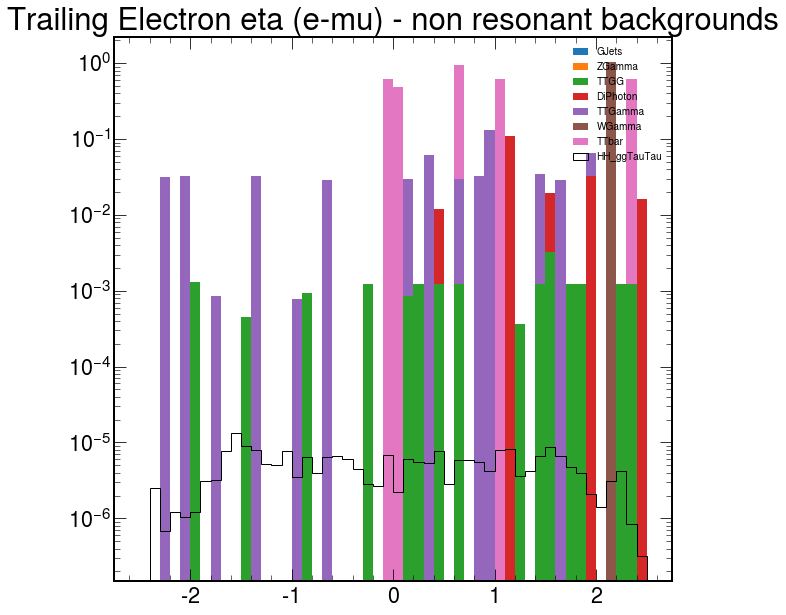

In [33]:
ele2_eta_binning = "50,-2.5,2.5" # ROOT convention # Only electrons!

ele2_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "weight"]
        ele2_eta_hists[process] = Hist1D(toFill.values, bins=ele2_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele2_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_eta_hists["Data"].plot(show_errors=True, color="k")
ele2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron eta (e-mu) - non resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron pt (e-mu) - resonant backgrounds')

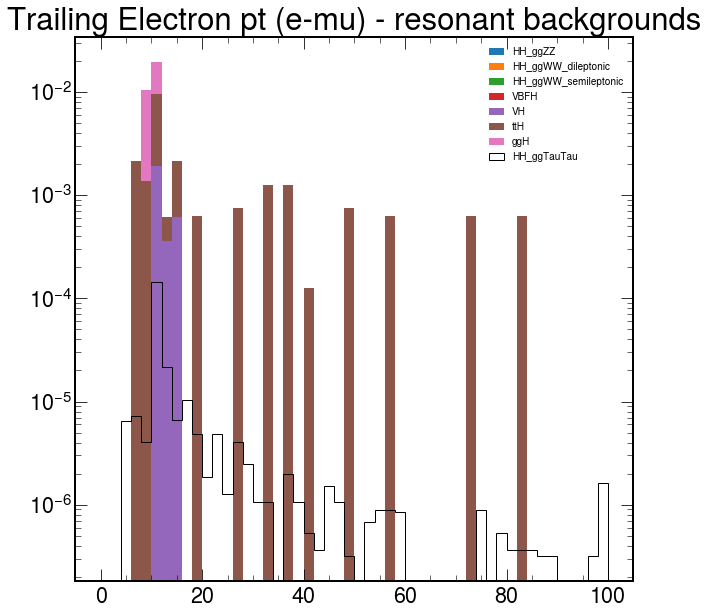

In [34]:
ele2_pt_binning = "50,0,100" # ROOT convention # Only electrons!

ele2_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "weight"]
        ele2_pt_hists[process] = Hist1D(toFill.values, bins=ele2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_pt_hists["Data"].plot(show_errors=True, color="k")
ele2_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron pt (e-mu) - resonant backgrounds")

Text(0.5, 1.0, 'Trailing Electron eta (e-mu) - resonant backgrounds')

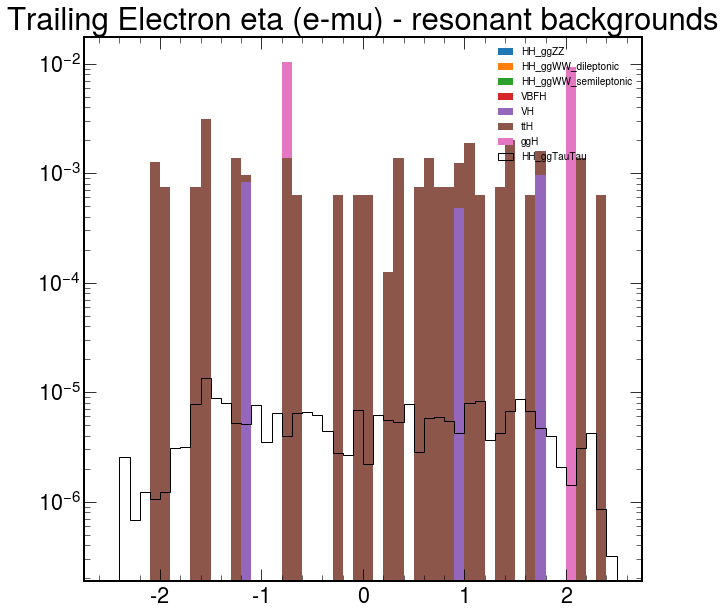

In [35]:
ele2_eta_binning = "50,-2.5,2.5" # ROOT convention # Only electrons!

ele2_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 11), "weight"]
        ele2_eta_hists[process] = Hist1D(toFill.values, bins=ele2_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in ele2_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele2_eta_hists["Data"].plot(show_errors=True, color="k")
ele2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Electron eta (e-mu) - resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon pt (mumu, mu-e and mu-tau) - non resonant backgrounds')

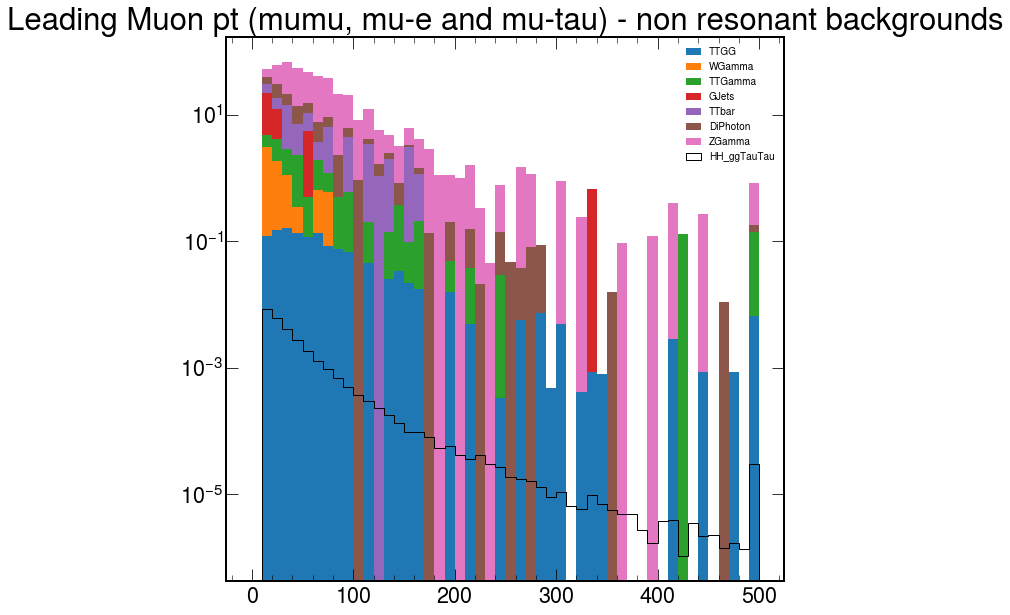

In [36]:
mu1_pt_binning = "50,0,500" # ROOT convention # Only muons

mu1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "weight"]
        mu1_pt_hists[process] = Hist1D(toFill.values, bins=mu1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mu1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_pt_hists["Data"].plot(show_errors=True, color="k")
mu1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon pt (mumu, mu-e and mu-tau) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon eta (mumu, mu-e and mu-tau) - non resonant backgrounds')

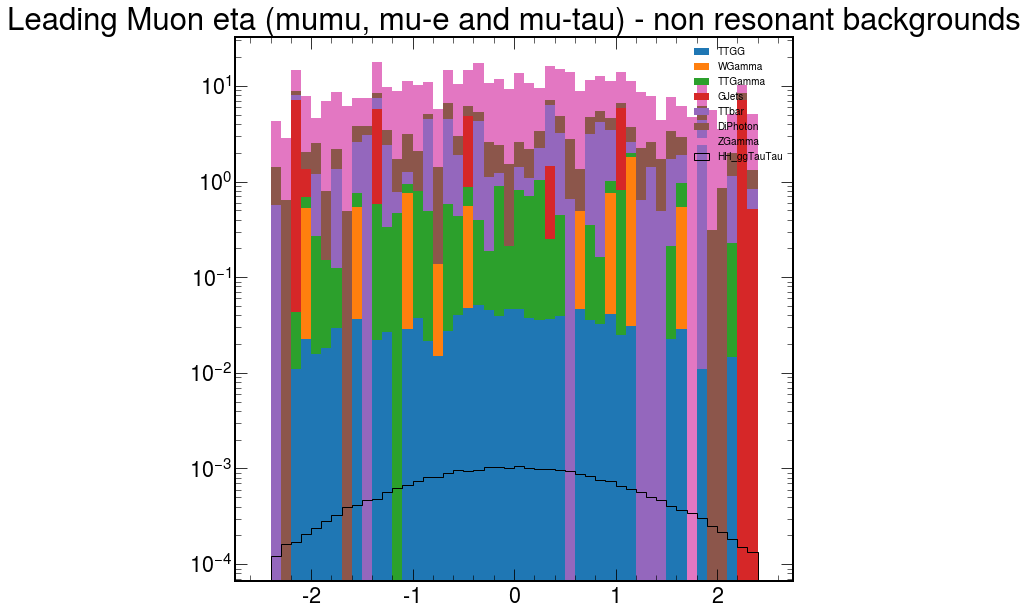

In [37]:
mu1_eta_binning = "50,-2.5,2.5" # ROOT convention # Only muons

mu1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "weight"]
        mu1_eta_hists[process] = Hist1D(toFill.values, bins=mu1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mu1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_eta_hists["Data"].plot(show_errors=True, color="k")
mu1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon eta (mumu, mu-e and mu-tau) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon pt (mumu, mu-e and mu-tau) - resonant backgrounds')

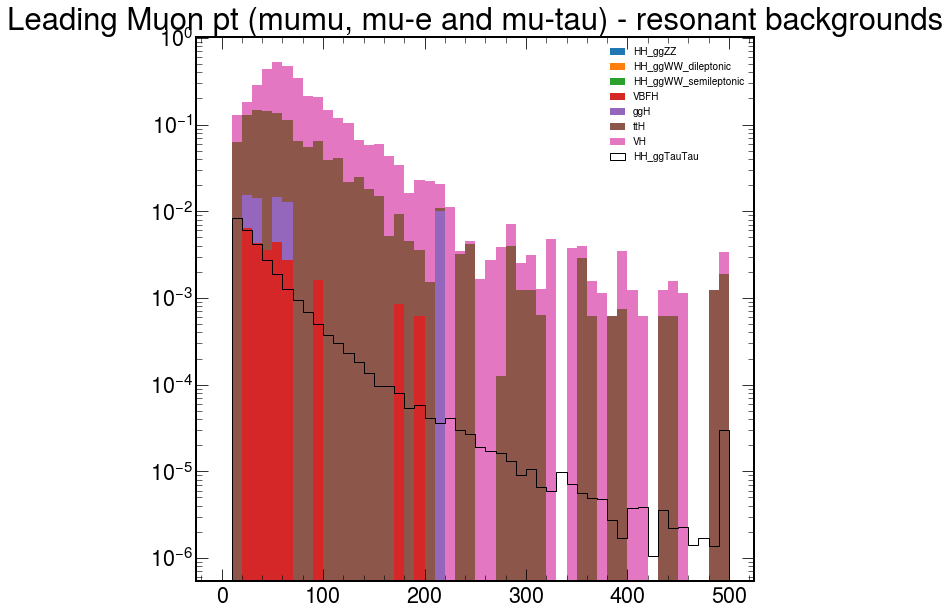

In [38]:
mu1_pt_binning = "50,0,500" # ROOT convention # Only muons

mu1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "weight"]
        mu1_pt_hists[process] = Hist1D(toFill.values, bins=mu1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mu1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_pt_hists["Data"].plot(show_errors=True, color="k")
mu1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon pt (mumu, mu-e and mu-tau) - resonant backgrounds")

Text(0.5, 1.0, 'Leading Muon eta (mumu, mu-e and mu-tau) - resonant backgrounds')

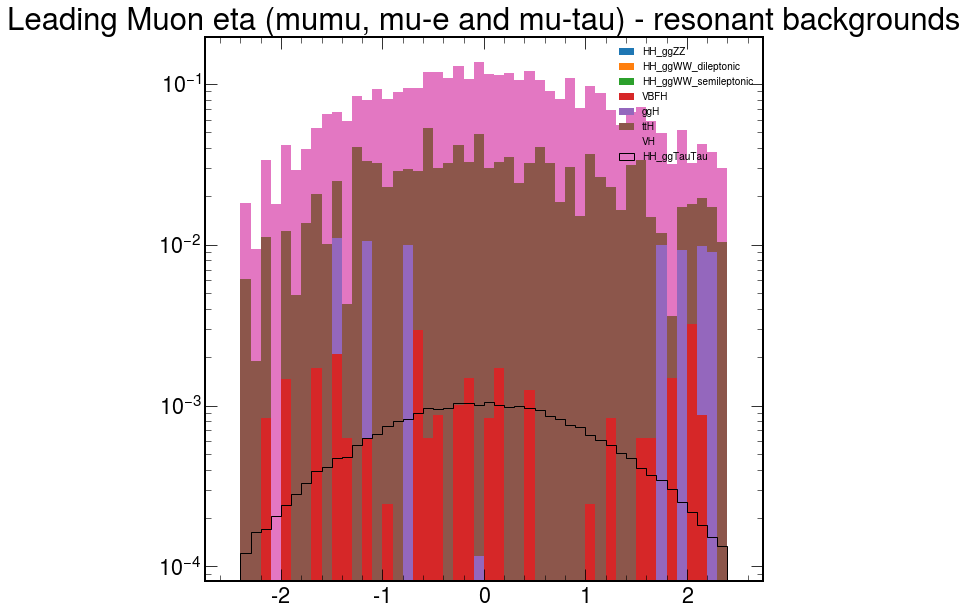

In [39]:
mu1_eta_binning = "50,-2.5,2.5" # ROOT convention # Only muons

mu1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 13), "weight"]
        mu1_eta_hists[process] = Hist1D(toFill.values, bins=mu1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in mu1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#mu1_eta_hists["Data"].plot(show_errors=True, color="k")
mu1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Muon eta (mumu, mu-e and mu-tau) - resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau pt (tau-tau, tau-iso) - non resonant backgrounds')

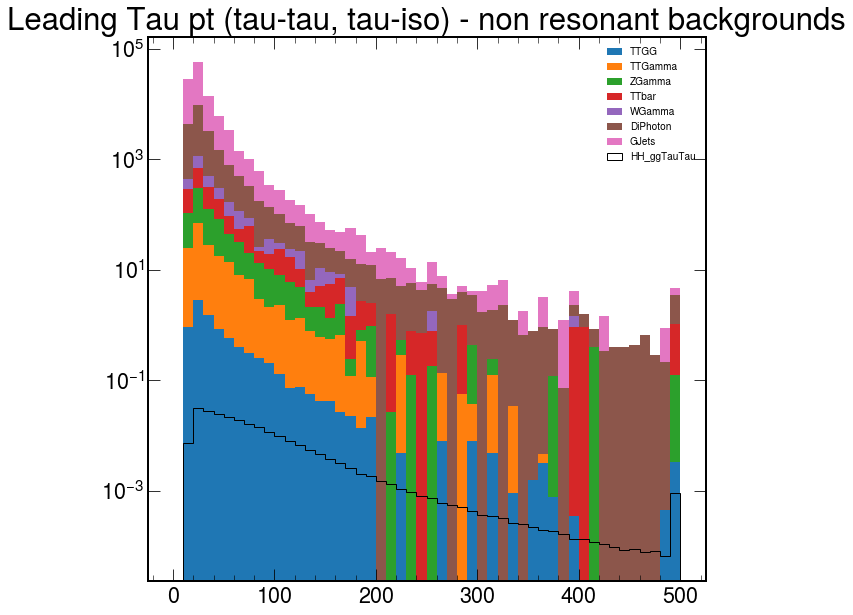

In [49]:
tau1_pt_binning = "50,0,500" # ROOT convention # Only muons

tau1_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "weight"]
        tau1_pt_hists[process] = Hist1D(toFill.values, bins=tau1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_pt_hists["Data"].plot(show_errors=True, color="k")
tau1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau pt (tau-tau, tau-iso) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau eta (tau-tau, tau-iso) - non resonant backgrounds')

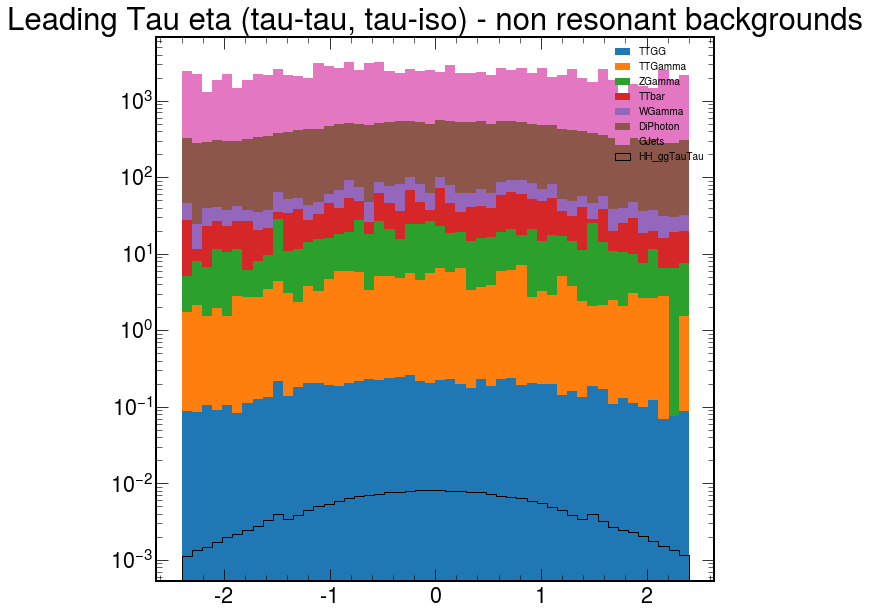

In [50]:
tau1_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau1_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "weight"]
        tau1_eta_hists[process] = Hist1D(toFill.values, bins=tau1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and nofn-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_eta_hists["Data"].plot(show_errors=True, color="k")
tau1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau eta (tau-tau, tau-iso) - non resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau pt (tau-tau, tau-iso) - resonant backgrounds')

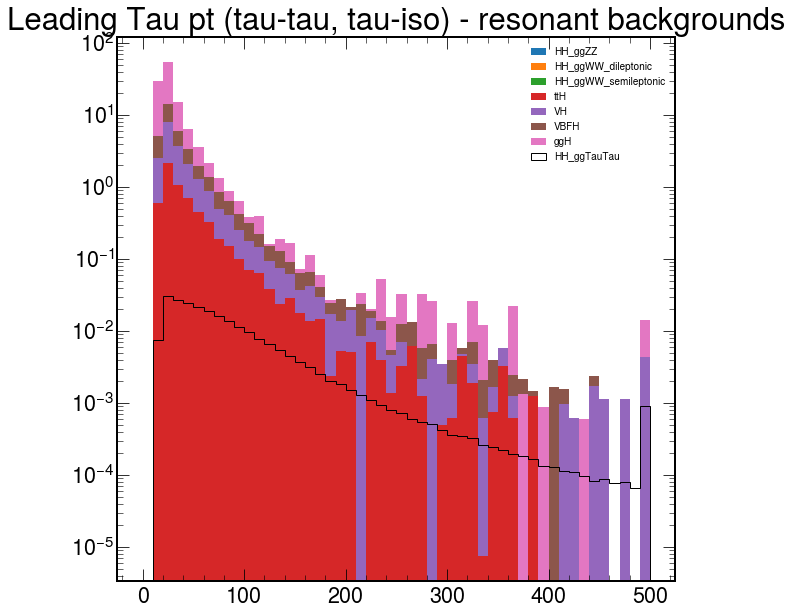

In [51]:
tau1_pt_binning = "50,0,500" # ROOT convention # Only muons

tau1_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "lep1_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "weight"]
        tau1_pt_hists[process] = Hist1D(toFill.values, bins=tau1_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_pt_hists["Data"].plot(show_errors=True, color="k")
tau1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau pt (tau-tau, tau-iso) - resonant backgrounds")

Text(0.5, 1.0, 'Leading Tau eta (tau-tau, tau-iso) - resonant backgrounds')

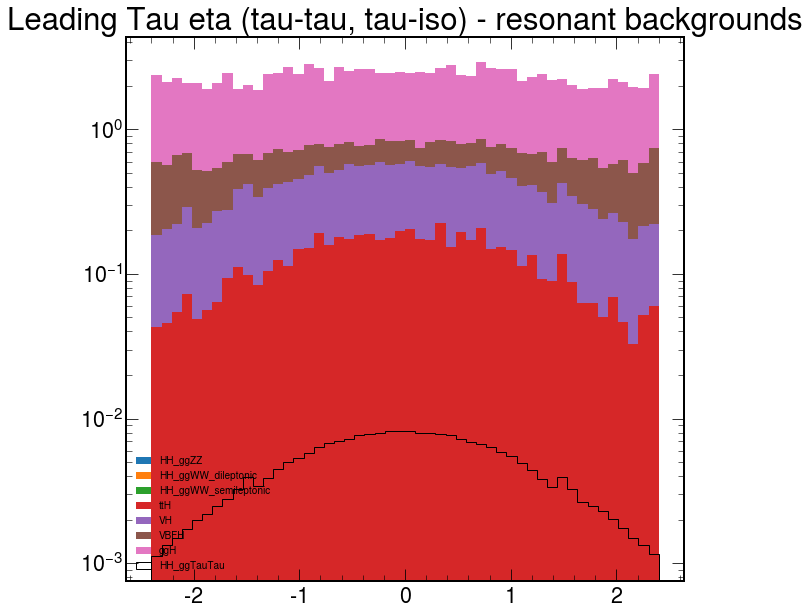

In [52]:
tau1_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau1_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "lep1_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep1_pdgId"]) == 15), "weight"]
        tau1_eta_hists[process] = Hist1D(toFill.values, bins=tau1_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau1_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and nofn-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau1_eta_hists["Data"].plot(show_errors=True, color="k")
tau1_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Leading Tau eta (tau-tau, tau-iso) - resonant backgrounds")

Text(0.5, 1.0, 'Trailing Tau pt (e-tau, mu-tau, tau-tau) - non resonant backgrounds')

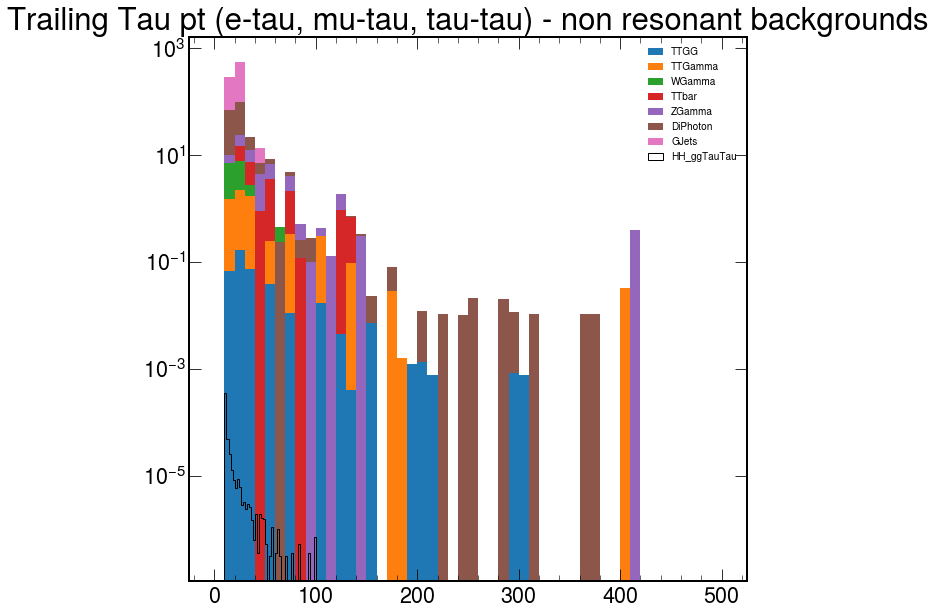

In [55]:
tau2_pt_binning = "50,0,500" # ROOT convention # Only muons

tau2_pt_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "weight"]
        tau2_pt_hists[process] = Hist1D(toFill.values, bins=tau2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau pt (e-tau, mu-tau, tau-tau) - non resonant backgrounds")

Text(0.5, 1.0, 'Trailing Tau eta (e-tau, mu-tau, tau-tau) - non resonant backgrounds')

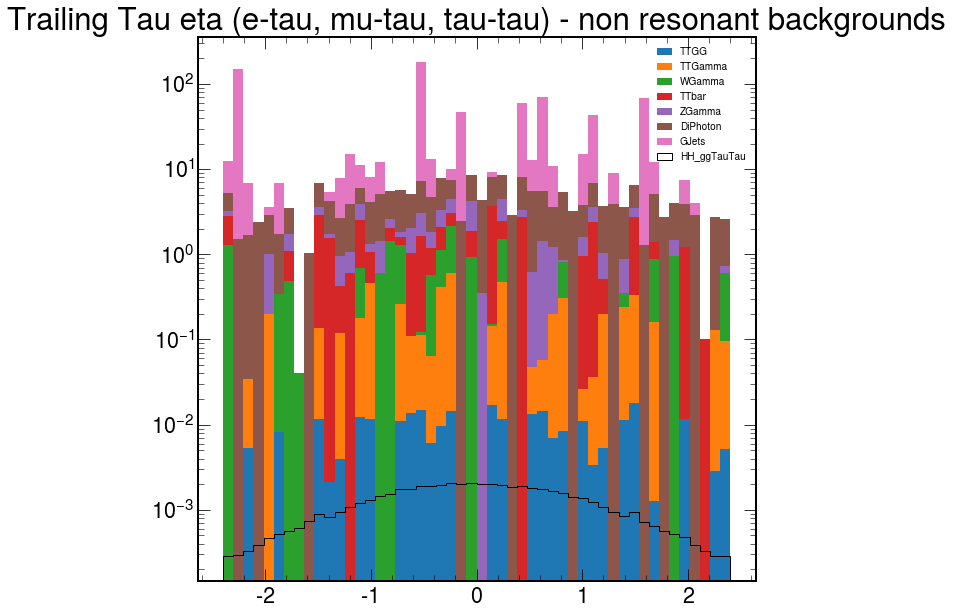

In [54]:
tau2_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau2_eta_hists = {}
for process, process_id in process_ids.items():
    if not is_resonant[process] or "HH_ggTauTau" in process:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "weight"]
        tau2_eta_hists[process] = Hist1D(toFill.values, bins=tau2_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau2_eta_hists["Data"].plot(show_errors=True, color="k")
tau2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau eta (e-tau, mu-tau, tau-tau) - non resonant backgrounds")

Text(0.5, 1.0, 'Trailing Tau pt (e-tau, mu-tau, tau-tau) - resonant backgrounds')

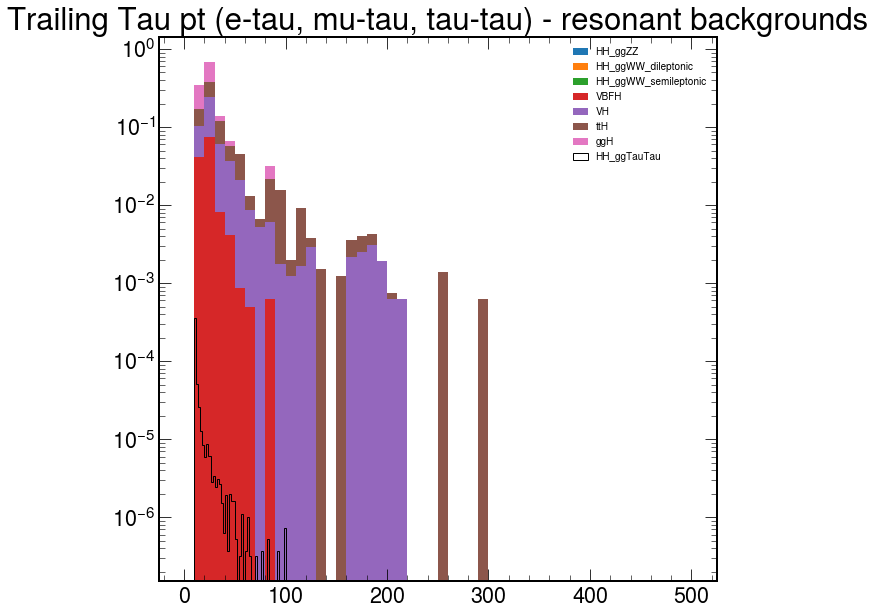

In [46]:
tau2_pt_binning = "50,0,500" # ROOT convention # Only muons

tau2_pt_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "lep2_pt"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "weight"]
        tau2_pt_hists[process] = Hist1D(toFill.values, bins=tau2_pt_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_pt_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#ele1_pt_hists["Data"].plot(show_errors=True, color="k")
ele1_pt_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau pt (e-tau, mu-tau, tau-tau) - resonant backgrounds")

Text(0.5, 1.0, 'Trailing Tau eta (e-tau, mu-tau, tau-tau) - resonant backgrounds')

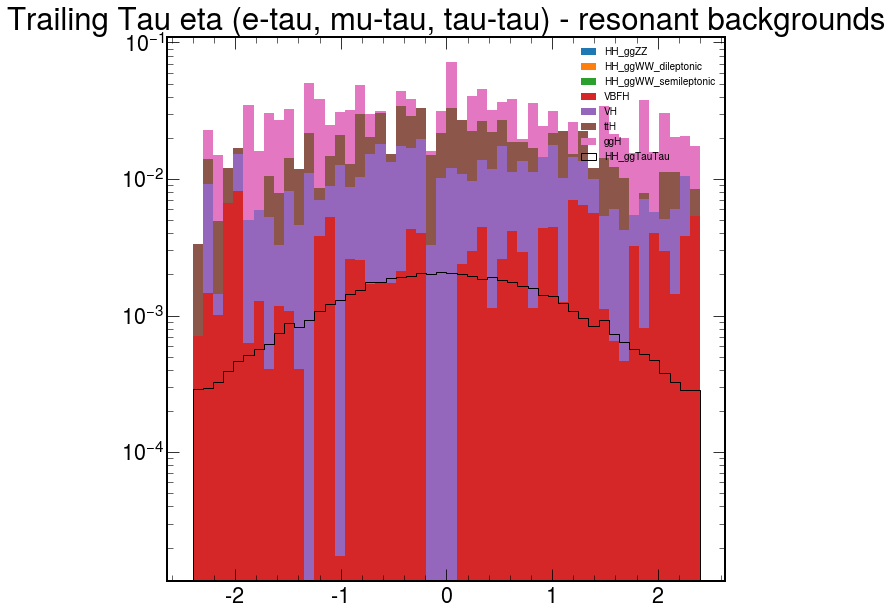

In [47]:
tau2_eta_binning = "50,-2.4,2.4" # ROOT convention # Only muons

tau2_eta_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process]:
        toFill = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "lep2_eta"] # select by process, then select the quantity
        weight = df.loc[(df["process_id"] == process_id) & (abs(df["lep2_pdgId"]) == 15), "weight"]
        tau2_eta_hists[process] = Hist1D(toFill.values, bins=tau2_eta_binning, label=process, weights=weight)

# plots
# stack non-signals
hist_stack = [hist for process, hist in tau2_eta_hists.items() if process != "HH_ggTauTau" and process != "Data"]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# split by resonant and non-resonant backgrounds
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
#tau2_eta_hists["Data"].plot(show_errors=True, color="k")
tau2_eta_hists["HH_ggTauTau"].plot(color="k", histtype="step")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.title("Trailing Tau eta (e-tau, mu-tau, tau-tau) - resonant backgrounds")